/mnt/netapp2/Store_uni/home/usc/ci/avs/personal/aprendizaje/p4/venvP4/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


=== OPTIMIZACIÓN RÁPIDA DE CATBOOST PARA PRUEBA DE CONCEPTO ===

Valores faltantes en el dataset: 0
Características categóricas detectadas: []
Forma del dataset: (20000, 47)

=== Entrenando modelo inicial para análisis (versión rápida) ===
0:	learn: 116578.9865363	test: 115789.6734406	best: 115789.6734406 (0)	total: 50.6ms	remaining: 5.01s
50:	learn: 29909.2444078	test: 32895.0879358	best: 32895.0879358 (50)	total: 922ms	remaining: 886ms
99:	learn: 26453.9226886	test: 31500.3836266	best: 31500.3836266 (99)	total: 1.38s	remaining: 0us

bestTest = 31500.38363
bestIteration = 99

Tiempo de entrenamiento: 10.71 segundos
Métricas del modelo inicial:
  MAE: 31500.38
  RMSE: 44778.40
  R2: 0.9273

=== Optimización con Grid Search (versión rápida) ===
Params: iterations=50, lr=0.1, depth=4 - MAE: 33634.4938
Params: iterations=50, lr=0.1, depth=6 - MAE: 32958.6170
Params: iterations=50, lr=0.3, depth=4 - MAE: 32503.2000
Params: iterations=50, lr=0.3, depth=6 - MAE: 33156.4817
Params: iterations

[I 2025-05-06 19:25:29,605] A new study created in memory with name: no-name-9e742e85-82cb-4253-90ab-6967d55b6ddb


Params: iterations=100, lr=0.3, depth=6 - MAE: 33156.4817
Tiempo de Grid Search: 93.15 segundos
Mejor MAE encontrado: 31344.1773
Mejores parámetros: {'iterations': 100, 'learning_rate': 0.1, 'depth': 4, 'loss_function': 'MAE', 'eval_metric': 'MAE', 'random_seed': 42, 'verbose': 0}

=== Optimización con Optuna (versión rápida) ===


[I 2025-05-06 19:25:37,485] Trial 0 finished with value: 32946.78252469592 and parameters: {'iterations': 146, 'learning_rate': 0.28588498479073365, 'depth': 6, 'l2_leaf_reg': 2.4356262323599944}. Best is trial 0 with value: 32946.78252469592.
[I 2025-05-06 19:25:50,824] Trial 1 finished with value: 31260.20243878559 and parameters: {'iterations': 132, 'learning_rate': 0.08407689242421, 'depth': 5, 'l2_leaf_reg': 1.073515297206049}. Best is trial 1 with value: 31260.20243878559.
[I 2025-05-06 19:26:05,915] Trial 2 finished with value: 32316.100612103535 and parameters: {'iterations': 96, 'learning_rate': 0.08684980043164582, 'depth': 4, 'l2_leaf_reg': 2.9950803758553186}. Best is trial 1 with value: 31260.20243878559.
[I 2025-05-06 19:26:19,553] Trial 3 finished with value: 32814.511176488326 and parameters: {'iterations': 60, 'learning_rate': 0.22927047379061877, 'depth': 4, 'l2_leaf_reg': 1.4900795570347665}. Best is trial 1 with value: 31260.20243878559.
[I 2025-05-06 19:26:26,528] 

Mejor valor de MAE encontrado: 31163.7559
Mejores parámetros: {'iterations': 154, 'learning_rate': 0.10095985466716671, 'depth': 6, 'l2_leaf_reg': 3.013119551770508, 'loss_function': 'MAE', 'eval_metric': 'MAE', 'verbose': 50, 'random_seed': 42}
0:	learn: 116474.1797100	test: 115687.6408501	best: 115687.6408501 (0)	total: 83.6ms	remaining: 12.8s
50:	learn: 29896.1319792	test: 32998.7256599	best: 32998.7256599 (50)	total: 593ms	remaining: 1.2s
100:	learn: 26336.5910240	test: 31589.9981320	best: 31577.5246162 (96)	total: 1.84s	remaining: 964ms
150:	learn: 24122.3805749	test: 31214.4346921	best: 31214.4346921 (150)	total: 2.9s	remaining: 57.6ms
153:	learn: 24002.6548634	test: 31163.7559065	best: 31163.7559065 (153)	total: 2.91s	remaining: 0us

bestTest = 31163.75591
bestIteration = 153

Métricas del modelo final:
  MAE: 31163.76
  RMSE: 44777.79
  R2: 0.9273


/mnt/netapp2/Store_uni/home/usc/ci/avs/personal/aprendizaje/p4/venvP4/lib/python3.7/site-packages/ipykernel_launcher.py:225: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.



=== Evaluación final del modelo (simplificada) ===
MAE en entrenamiento: 24002.65
MAE en prueba: 31163.76
RMSE en prueba: 44777.79
R² en prueba: 0.9273

Modelo guardado como 'resultados_small_small/mejor_modelo_catboost.cbm'

=== Análisis de hiperparámetros (simplificado) ===
Analizando 'loss_function':
  loss_function=MAE: MAE=31577.5246
  loss_function=RMSE: MAE=30967.0372

=== PROCESO DE OPTIMIZACIÓN COMPLETADO ===
Tiempo total: 306.23 segundos
Los resultados_small_small y gráficos se han guardado en la carpeta 'resultados_small_small'
El mejor modelo se ha guardado como 'resultados_small_small/mejor_modelo_catboost.cbm'


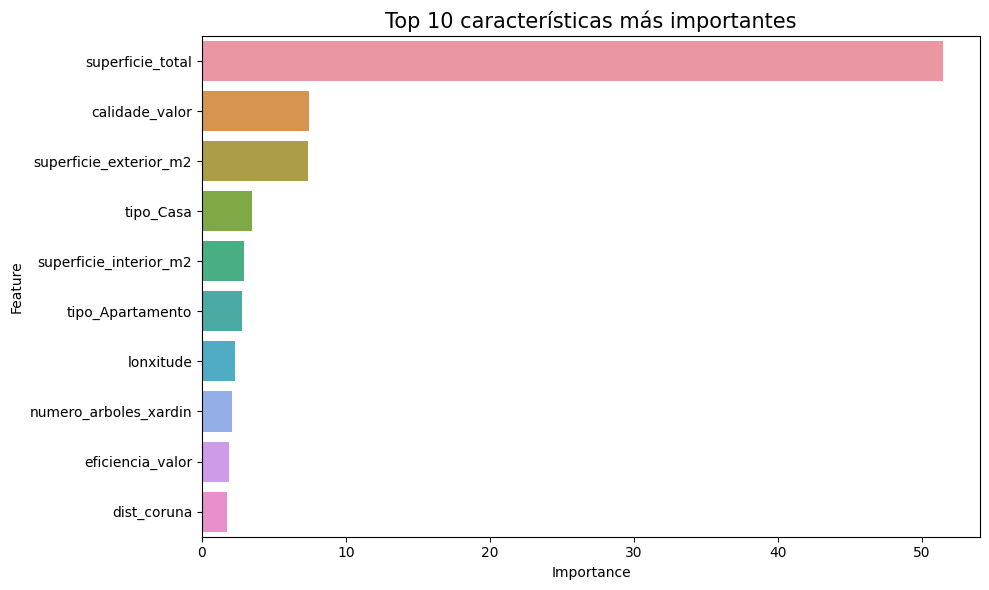

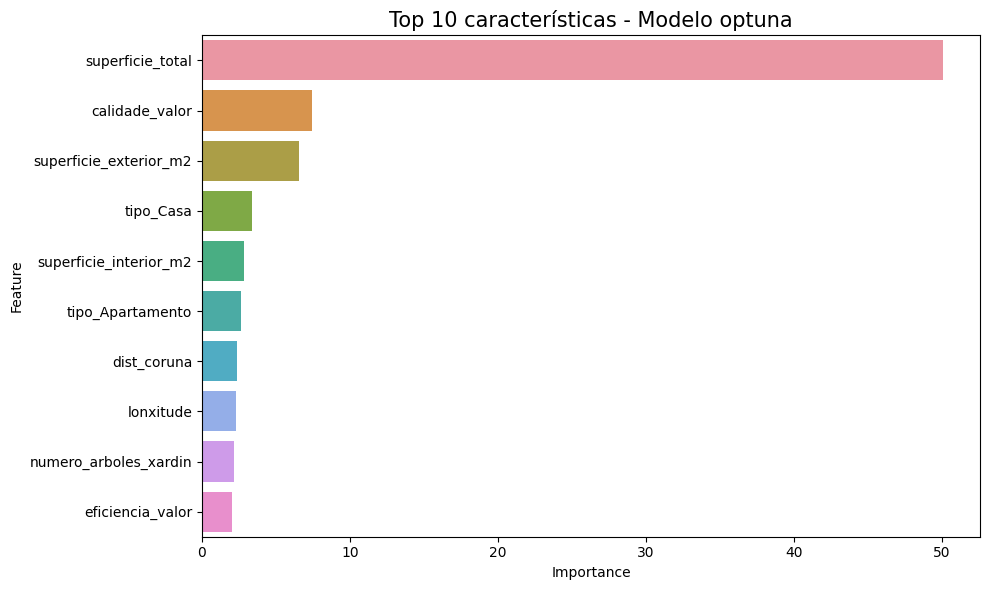

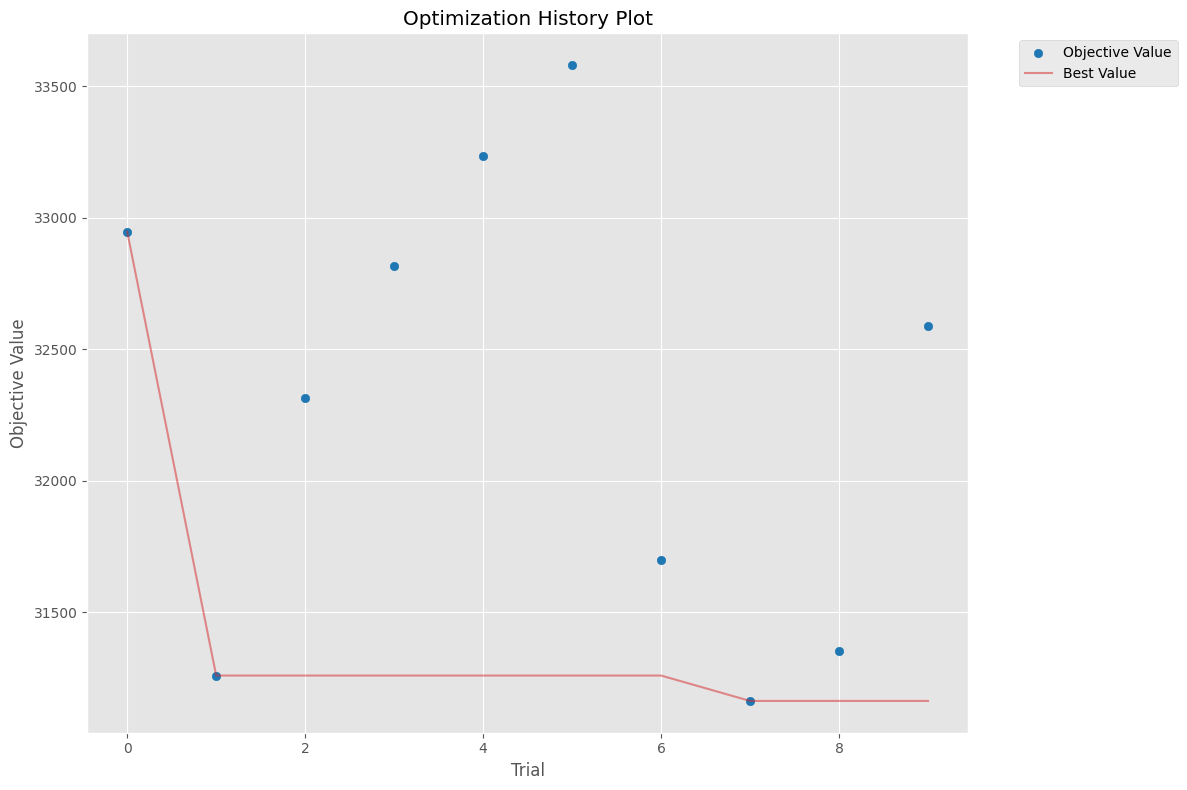

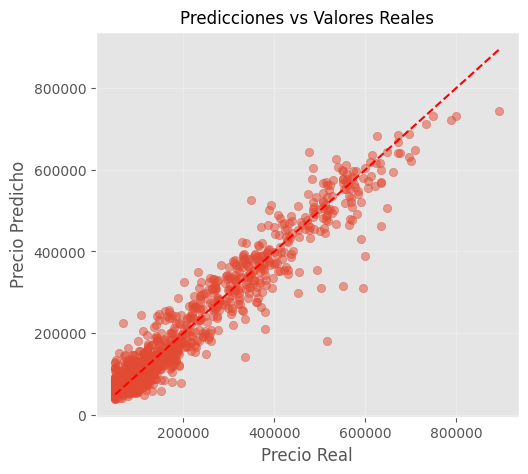

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import optuna
import os

# Configuración para visualización
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette("viridis")
os.makedirs('resultados_small_small', exist_ok=True)

# Función para cargar y preparar los datos
def load_data(file_path):
    df = pd.read_csv(file_path)
    
    # Verificar y gestionar valores faltantes
    print(f"Valores faltantes en el dataset: {df.isnull().sum().sum()}")
    
    # Identificar columnas categóricas automáticamente
    categorical_features = []
    for col in df.columns:
        if df[col].dtype == 'object' or col in ['tipo_edificacion', 'calidade_materiais', 
                                               'cor_favorita_propietario', 'acceso_transporte_publico',
                                               'orientacion', 'eficiencia_enerxetica']:
            categorical_features.append(col)
    
    print(f"Características categóricas detectadas: {categorical_features}")
    
    # Separamos features y target
    X = df.drop(['prezo_euros', 'id'], axis=1, errors='ignore')
    y = df['prezo_euros']
    
    print(f"Forma del dataset: {df.shape}")
    
    # Para acelerar, podemos usar una muestra más pequeña
    if len(df) > 5000:
        X_sample = X.sample(5000, random_state=42)
        y_sample = y.loc[X_sample.index]
        return X_sample, y_sample, categorical_features
    
    return X, y, categorical_features

# FASE 1: Entrenamiento base y análisis (versión rápida)
def train_initial_model(X, y, cat_features=None, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=random_state
    )
    
    # Parámetros iniciales simplificadosre
    initial_params = {
        'iterations': 100,  # Reducido de 1000
        'learning_rate': 0.1,  # Aumentado para convergencia más rápida
        'depth': 6,
        'loss_function': 'MAE',
        'eval_metric': 'MAE',
        'random_seed': random_state,
        'verbose': 50  # Menos outputs
    }
    
    print("\n=== Entrenando modelo inicial para análisis (versión rápida) ===")
    
    # Crear pool de datos para CatBoost
    train_pool = Pool(X_train, y_train, cat_features=cat_features)
    test_pool = Pool(X_test, y_test, cat_features=cat_features)
    
    # Entrenar modelo
    start_time = time.time()
    model = CatBoostRegressor(**initial_params)
    model.fit(train_pool, eval_set=test_pool, use_best_model=True)
    train_time = time.time() - start_time
    
    print(f"Tiempo de entrenamiento: {train_time:.2f} segundos")
    
    # Evaluar modelo
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print(f"Métricas del modelo inicial:")
    print(f"  MAE: {mae:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R2: {r2:.4f}")
    
    # Analizar importancia de características (simplificado)
    feature_importance = model.get_feature_importance()
    feature_names = X.columns
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    importance_df = importance_df.sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))  # Solo top 10
    plt.title('Top 10 características más importantes', fontsize=15)
    plt.tight_layout()
    plt.savefig('resultados_small_small/initial_feature_importance.png')
    
    return model, X_train, X_test, y_train, y_test, cat_features, importance_df

# FASE 2: Optimización con Grid Search (versión rápida)
def optimize_with_grid_search(X_train, y_train, X_test, y_test, cat_features=None, random_state=42):
    print("\n=== Optimización con Grid Search (versión rápida) ===")
    
    # Grid de parámetros reducido
    param_grid = {
        'iterations': [50, 100],  # Muy reducido
        'learning_rate': [0.1, 0.3],  # Valores más altos para entrenamiento rápido
        'depth': [4, 6]
    }
    
    best_mae = float('inf')
    best_params = None
    best_model = None
    
    # Búsqueda manual en lugar de GridSearchCV para más velocidad
    start_time = time.time()
    for iterations in param_grid['iterations']:
        for lr in param_grid['learning_rate']:
            for depth in param_grid['depth']:
                params = {
                    'iterations': iterations,
                    'learning_rate': lr,
                    'depth': depth,
                    'loss_function': 'MAE',
                    'eval_metric': 'MAE',
                    'random_seed': random_state,
                    'verbose': 0
                }
                
                # Entrenamiento simple
                model = CatBoostRegressor(**params)
                model.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_test, y_test), 
                         early_stopping_rounds=10, verbose=False)
                
                # Evaluación
                y_pred = model.predict(X_test)
                mae = mean_absolute_error(y_test, y_pred)
                
                print(f"Params: iterations={iterations}, lr={lr}, depth={depth} - MAE: {mae:.4f}")
                
                if mae < best_mae:
                    best_mae = mae
                    best_params = params
                    best_model = model
    
    gs_time = time.time() - start_time
    
    print(f"Tiempo de Grid Search: {gs_time:.2f} segundos")
    print(f"Mejor MAE encontrado: {best_mae:.4f}")
    print(f"Mejores parámetros: {best_params}")
    
    return best_model, best_params

# FASE 3: Optimización con Optuna (versión rápida)
def optimize_with_optuna(X_train, y_train, X_test, y_test, cat_features=None, n_trials=10, random_state=42):
    print("\n=== Optimización con Optuna (versión rápida) ===")
    
    # Función objetivo simplificada para Optuna
    def objective(trial):
        param = {
            'iterations': trial.suggest_int('iterations', 50, 200),  # Reducido
            'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.3),  # Rango más alto
            'depth': trial.suggest_int('depth', 4, 8),
            'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1.0, 5.0),
            'loss_function': 'MAE',
            'eval_metric': 'MAE',
            'verbose': 0,
            'random_seed': random_state
        }
        
        # Validación simple en lugar de k-fold
        model = CatBoostRegressor(**param)
        model.fit(X_train, y_train, cat_features=cat_features, 
                 eval_set=(X_test, y_test), early_stopping_rounds=10, verbose=False)
        
        preds = model.predict(X_test)
        mae = mean_absolute_error(y_test, preds)
        
        return mae
    
    # Crear estudio de Optuna
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=n_trials)
    
    # Mejores parámetros
    best_params = study.best_params
    best_params['iterations'] = int(best_params['iterations'])
    best_params['depth'] = int(best_params['depth'])
    best_params['loss_function'] = 'MAE'
    best_params['eval_metric'] = 'MAE'
    best_params['verbose'] = 50
    best_params['random_seed'] = random_state
    
    print(f"Mejor valor de MAE encontrado: {study.best_value:.4f}")
    print(f"Mejores parámetros: {best_params}")
    
    # Entrenar modelo final con los mejores parámetros
    train_pool = Pool(X_train, y_train, cat_features=cat_features)
    test_pool = Pool(X_test, y_test, cat_features=cat_features)
    
    final_model = CatBoostRegressor(**best_params)
    final_model.fit(train_pool, eval_set=test_pool, use_best_model=True)
    
    # Evaluar en conjunto de prueba
    y_pred = final_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print(f"Métricas del modelo final:")
    print(f"  MAE: {mae:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R2: {r2:.4f}")
    
    # Guardar análisis de importancia de características
    visualize_feature_importance(final_model, X_train, 'optuna', top_n=10)
    
    # Intentar visualizar resultados_small_small de Optuna (simplificado)
    try:
        # Solo una visualización
        fig = optuna.visualization.matplotlib.plot_optimization_history(study)
        plt.tight_layout()
        plt.savefig('resultados_small_small/optuna_optimization_history.png')
    except:
        print("No se pudieron generar los gráficos de Optuna")
    
    return final_model, best_params

# Función para visualizar la importancia de características (simplificada)
def visualize_feature_importance(model, X, method_name, top_n=10):
    feature_importance = model.get_feature_importance()
    feature_names = X.columns
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    importance_df = importance_df.sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(top_n))
    plt.title(f'Top {top_n} características - Modelo {method_name}', fontsize=15)
    plt.tight_layout()
    plt.savefig(f'resultados_small_small/{method_name}_feature_importance.png')
    
    return importance_df

# FASE 4: Evaluación final simplificada
def evaluate_final_model(model, X_train, X_test, y_train, y_test, cat_features=None):
    print("\n=== Evaluación final del modelo (simplificada) ===")
    
    # Predicciones
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Métricas
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_r2 = r2_score(y_test, y_pred_test)
    
    print(f"MAE en entrenamiento: {train_mae:.2f}")
    print(f"MAE en prueba: {test_mae:.2f}")
    print(f"RMSE en prueba: {test_rmse:.2f}")
    print(f"R² en prueba: {test_r2:.4f}")
    
    # Análisis visual simplificado
    plt.figure(figsize=(12, 5))
    
    # Predicciones vs reales
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred_test, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title('Predicciones vs Valores Reales', fontsize=12)
    plt.xlabel('Precio Real')
    plt.ylabel('Precio Predicho')
    plt.grid(True, alpha=0.3)
    
    # Guardar modelo final
    model.save_model('resultados_small_small/mejor_modelo_catboost.cbm')
    print("\nModelo guardado como 'resultados_small_small/mejor_modelo_catboost.cbm'")
    
    return {'train_mae': train_mae, 'test_mae': test_mae, 'test_rmse': test_rmse, 'test_r2': test_r2}

# FASE 5: Análisis de hiperparámetros simplificado
def advanced_hyperparameter_analysis(X_train, X_test, y_train, y_test, best_params, cat_features=None):
    print("\n=== Análisis de hiperparámetros (simplificado) ===")
    
    # Solo analizar un parámetro para demostración
    param_name = 'loss_function'
    param_values = ['MAE', 'RMSE']
    
    results = []
    base_params = best_params.copy()
    
    print(f"Analizando '{param_name}':")
    
    for value in param_values:
        current_params = base_params.copy()
        current_params[param_name] = value
        current_params['iterations'] = 100  # Forzar menos iteraciones
        
        # Crear y entrenar modelo
        model = CatBoostRegressor(**current_params)
        model.fit(X_train, y_train, cat_features=cat_features, 
                  eval_set=(X_test, y_test), use_best_model=True, 
                  verbose=False)
        
        # Evaluar
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        
        print(f"  {param_name}={value}: MAE={mae:.4f}")
        
        results.append({
            'Parámetro': param_name,
            'Valor': value,
            'MAE': mae
        })
    
    return pd.DataFrame(results)

# Función principal optimizada
def main():
    print("=== OPTIMIZACIÓN RÁPIDA DE CATBOOST PARA PRUEBA DE CONCEPTO ===\n")
    
    # Cargar datos - ajusta la ruta al archivo CSV
    X, y, cat_features = load_data('train_processed.csv')
    
    # Registrar tiempo total
    start_time = time.time()
    
    # Fase 1: Entrenamiento inicial y análisis
    initial_model, X_train, X_test, y_train, y_test, cat_features, importance_df = train_initial_model(X, y, cat_features)
    
    # Fase 2: Optimización con Grid Search simplificado
    gs_model, gs_best_params = optimize_with_grid_search(X_train, y_train, X_test, y_test, cat_features)
    
    # Fase 3: Optimización con Optuna (reducida)
    final_model, best_params = optimize_with_optuna(X_train, y_train, X_test, y_test, cat_features, n_trials=10)
    
    # Fase 4: Evaluación final del modelo simplificada
    metrics = evaluate_final_model(final_model, X_train, X_test, y_train, y_test, cat_features)
    
    # Fase 5: Análisis simplificado de hiperparámetros
    hyperparameter_analysis = advanced_hyperparameter_analysis(X_train, X_test, y_train, y_test, best_params, cat_features)
    
    total_time = time.time() - start_time
    
    print("\n=== PROCESO DE OPTIMIZACIÓN COMPLETADO ===")
    print(f"Tiempo total: {total_time:.2f} segundos")
    print(f"Los resultados_small_small y gráficos se han guardado en la carpeta 'resultados_small_small'")
    print(f"El mejor modelo se ha guardado como 'resultados_small_small/mejor_modelo_catboost.cbm'")

if __name__ == "__main__":
    main()

In [2]:

# Verificar la existencia del modelo entrenado
model_path = 'resultados_small_small/mejor_modelo_catboost.cbm'
if not os.path.exists(model_path):
    print(f"¡Error! No se encuentra el modelo en {model_path}")
    print("Por favor, asegúrate de ejecutar primero el script de entrenamiento")
    exit(1)

print("=== Generando predicciones para el conjunto de prueba ===")

# Cargar el dataset de prueba
print("Cargando datos de prueba...")
test_df = pd.read_csv('test_processed.csv')

# Extraer los IDs para el submission
ids = test_df['id']

# Verificar características categóricas (usando las mismas que en entrenamiento)
categorical_features = []
for col in test_df.columns:
    if test_df[col].dtype == 'object' or col in ['tipo_edificacion', 'calidade_materiais', 
                                              'cor_favorita_propietario', 'acceso_transporte_publico',
                                              'orientacion', 'eficiencia_enerxetica']:
        categorical_features.append(col)

print(f"Características categóricas detectadas: {categorical_features}")

# Preparar los datos para la predicción (eliminar cualquier columna que no sea una feature)
X_test = test_df.drop(['id', 'Unnamed: 0'], axis=1, errors='ignore')
if 'prezo_euros' in X_test.columns:
    X_test = X_test.drop(['prezo_euros'], axis=1, errors='ignore')

print(f"Forma del dataset de prueba: {X_test.shape}")

# Cargar el modelo entrenado
print("Cargando el modelo entrenado...")
model = CatBoostRegressor()
model.load_model(model_path)

# Realizar predicciones
print("Generando predicciones...")
predictions = model.predict(X_test)

# Crear el dataframe de submission
submission = pd.DataFrame({
    'id': ids,
    'prezo_euros': predictions
})

# Guardar el archivo de submission
submission_path = 'submission_catboost_small.csv'
submission.to_csv(submission_path, index=False)

print(f"¡Completado! Archivo de submission generado en {submission_path}")
print(f"Primeras filas del archivo de submission:")
print(submission.head(10))

# Estadísticas de las predicciones
print("\nEstadísticas de las predicciones:")
print(f"Mínimo: {predictions.min():.2f}")
print(f"Máximo: {predictions.max():.2f}")
print(f"Media: {predictions.mean():.2f}")
print(f"Mediana: {np.median(predictions):.2f}")
print(f"Desviación estándar: {predictions.std():.2f}")

=== Generando predicciones para el conjunto de prueba ===
Cargando datos de prueba...
Características categóricas detectadas: []
Forma del dataset de prueba: (10000, 45)
Cargando el modelo entrenado...
Generando predicciones...
¡Completado! Archivo de submission generado en submission_catboost_small.csv
Primeras filas del archivo de submission:
      id    prezo_euros
0   2309  477169.477330
1  22405  147407.222460
2  23398  427085.827353
3  25059  270232.516178
4   2665  565318.981178
5   8512   78655.075534
6   5149  589677.126925
7   7791  264271.852673
8  11312   96758.741329
9  19044  342247.709780

Estadísticas de las predicciones:
Mínimo: 34717.13
Máximo: 805033.13
Media: 222392.34
Mediana: 151509.26
Desviación estándar: 162559.28
